<a href="https://colab.research.google.com/github/mrandrivan/ML-DL-AI-practice/blob/main/Neural_Net_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1. Import the libraries & prep the data**

In [3]:
!pip install tensorflow

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')



** Step 2. define predictive features and define model building**

In [4]:
# Define features and target variable
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 3. Building the Neural Network**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a neural network model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(16, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 4. Train the model**

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4947 - loss: 0.7184 - val_accuracy: 0.6875 - val_loss: 0.6311
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5751 - loss: 0.6672 - val_accuracy: 0.7292 - val_loss: 0.5768
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8101 - loss: 0.5739 - val_accuracy: 0.7292 - val_loss: 0.5358
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.5247 - val_accuracy: 0.7083 - val_loss: 0.5051
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7837 - loss: 0.5015 - val_accuracy: 0.7083 - val_loss: 0.4886
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.4307 - val_accuracy: 0.7083 - val_loss: 0.4754
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.4265 - val_accuracy: 0.7083 - val_loss: 0.4643
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 0.3876 - val_accuracy: 0.7083 - 

**Step 6: Evaluating the Model**

After training, evaluate the model's performance on the test set.

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6632 - loss: 1.6466
Test Accuracy: 0.67


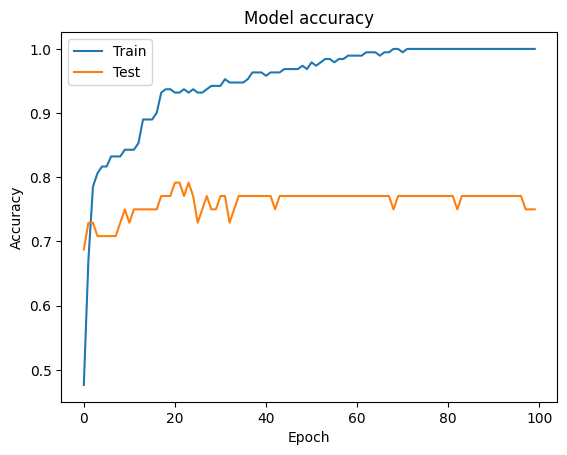

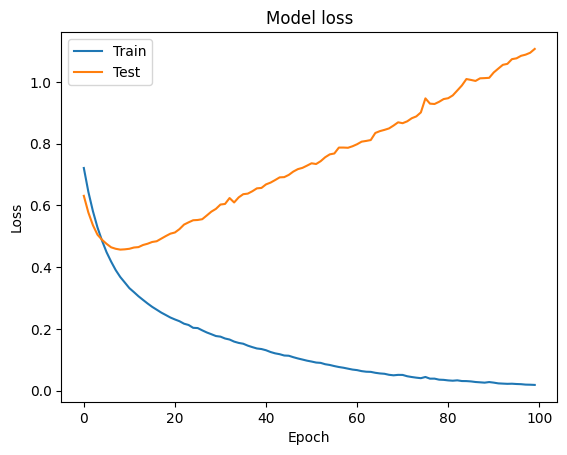

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values to check how well our model performs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
